In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flight = pd.read_csv('Predicting prices of airline flights.csv')
flight.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [3]:
flight = pd.read_csv('Predicting prices of airline flights.csv',index_col=0)
flight.head()

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [4]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [37]:
flight.describe()

duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

In [6]:
flight['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [7]:
flight['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [8]:
flight['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [9]:
#Number of observations
print("Total No. of observations : {}".format(len(flight)))

Total No. of observations : 300153


In [10]:
#The number of features/columns
print("Total No. of features : {}".format(len(flight.columns)))

Total No. of features : 11


In [11]:
flight.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [12]:
flight.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [13]:
# Calculate average price by airline
avg_price_airline = flight.groupby('airline')['price'].mean().reset_index()
avg_price_airline

airline         price
0    AirAsia   4091.072742
1  Air_India  23507.019112
2   GO_FIRST   5652.007595
3     Indigo   5324.216303
4   SpiceJet   6179.278881
5    Vistara  30396.536302

### Bar Plot

### Flights from Different Source Cities

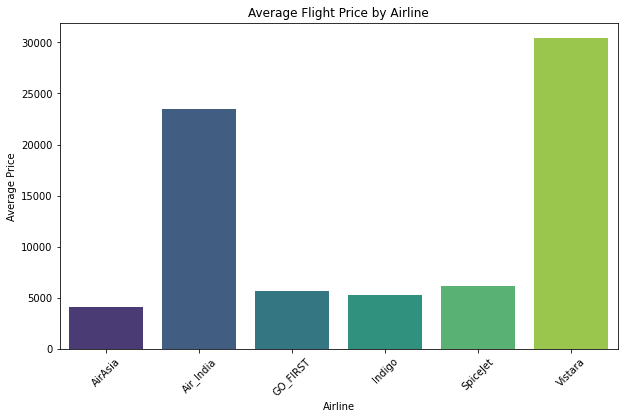

In [14]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=avg_price_airline,palette='viridis')
plt.title('Average Flight Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

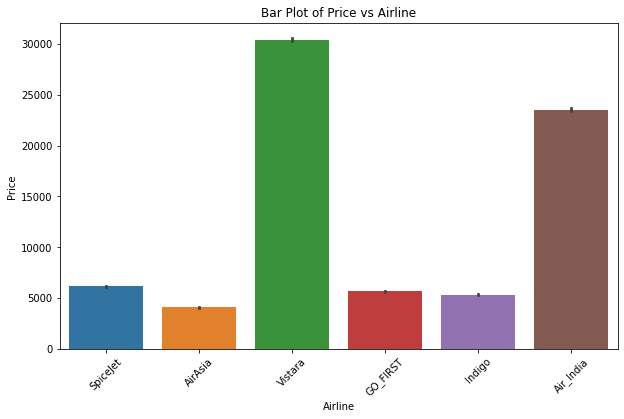

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=flight['airline'], y=flight['price'])

# Add labels and title
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Bar Plot of Price vs Airline')

# Rotate x-axis labels if necessary for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Count plot

### Flights from Different Source Cities

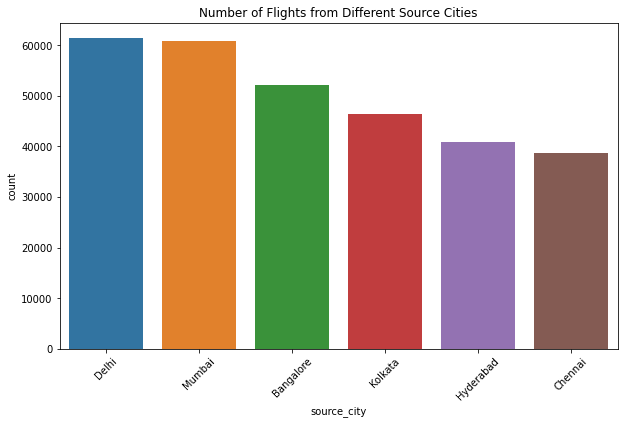

In [16]:
#To see the distribution of flights from different source citie
plt.figure(figsize=(10,6))
sns.countplot(x='source_city', data=flight)
plt.xticks(rotation=45)
plt.title('Number of Flights from Different Source Cities')
plt.show()

### Flights by Number of Stops

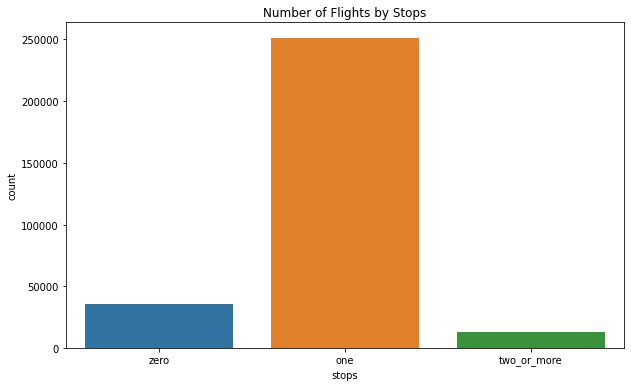

In [17]:
#To visualize the count of flights based on the number of stops:
plt.figure(figsize=(10,6))
sns.countplot(x='stops', data=flight)
plt.title('Number of Flights by Stops')
plt.show()

### Histogram

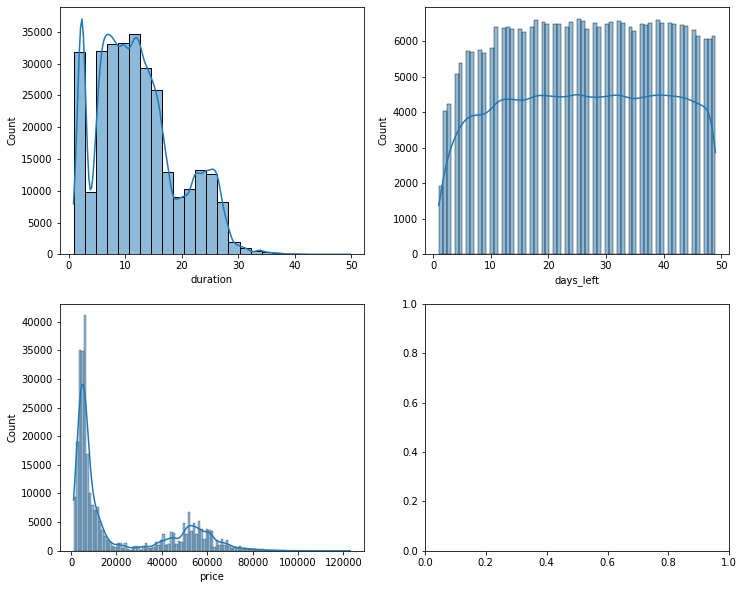

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.histplot(flight['duration'], kde=True,bins=25,ax=axes[0][0])
sns.histplot(flight['days_left'] , kde=True, ax=axes[0][1])
sns.histplot(flight['price'], kde=True, ax=axes[1][0])
plt.show()

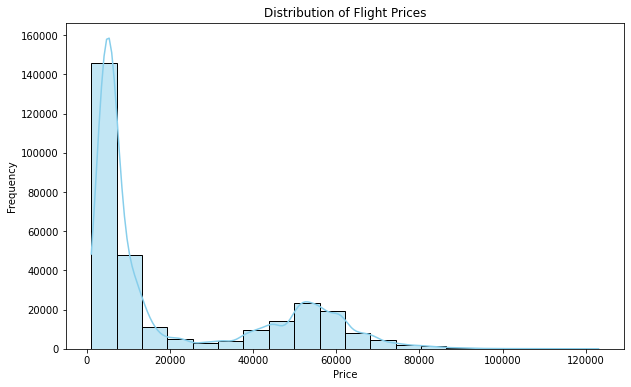

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(flight['price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

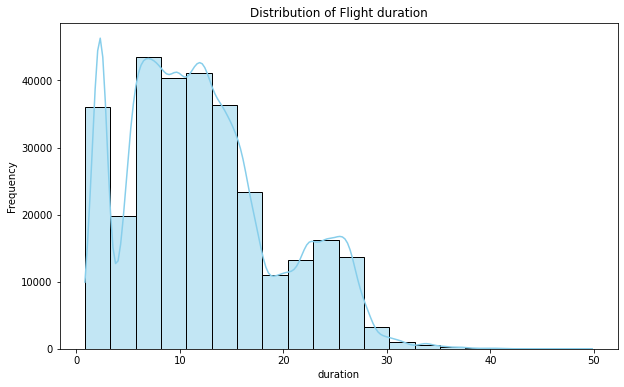

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(flight['duration'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Flight duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

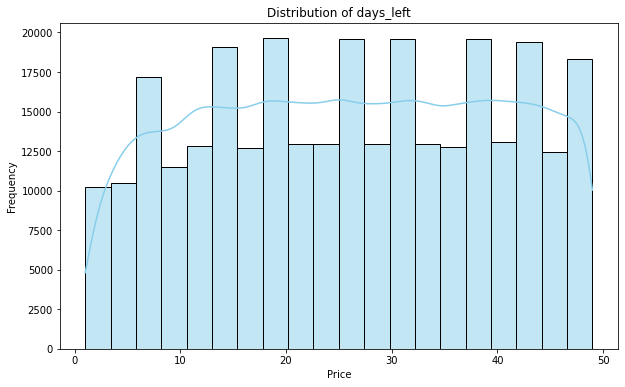

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(flight['days_left'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of days_left')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Box Plot: Price by Source City

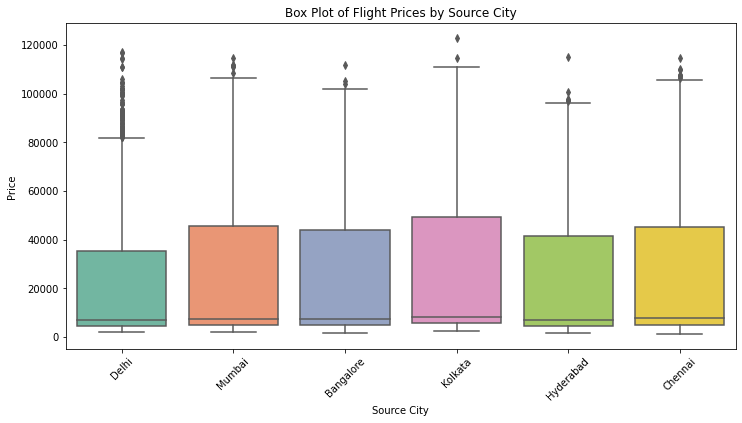

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_city', y='price', data=flight, palette='Set2')
plt.title('Box Plot of Flight Prices by Source City')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Flight Prices by Airline

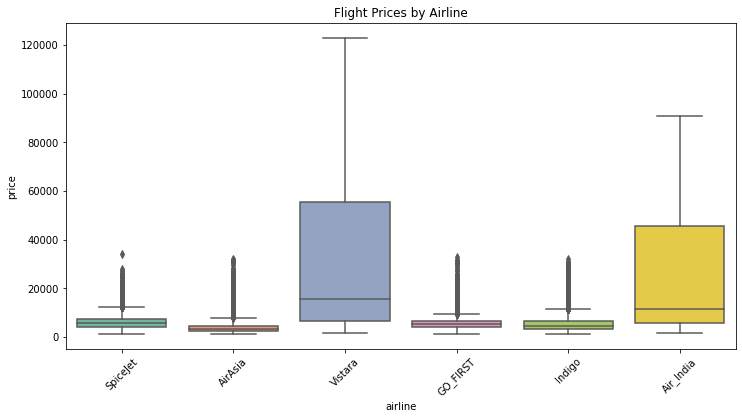

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=flight,palette='Set2')
plt.xticks(rotation=45)
plt.title('Flight Prices by Airline')
plt.show()

### Flight Prices by Class

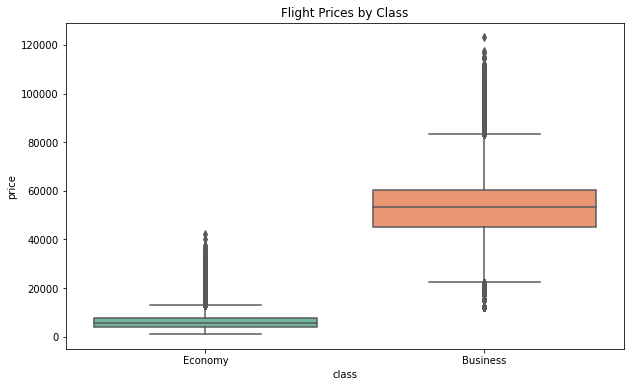

In [25]:
###To compare flight prices based on class (Economy, Business):
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='price', data=flight,palette='Set2')
plt.title('Flight Prices by Class')
plt.show()

### Flight Duration by Stops

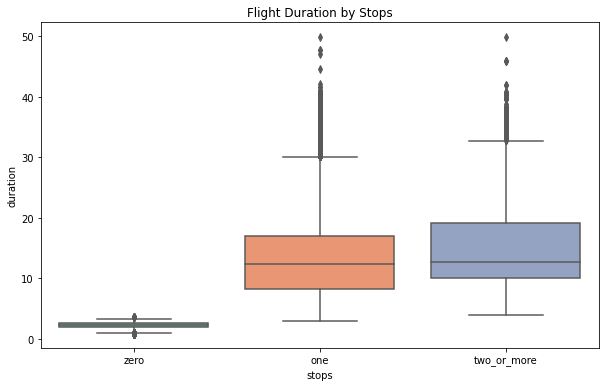

In [26]:
#To explore how the number of stops affects the flight duration
plt.figure(figsize=(10,6))
sns.boxplot(x='stops', y='duration', data=flight,palette='Set2')
plt.title('Flight Duration by Stops')
plt.show()

### Flight Prices by Source and Destination Cities

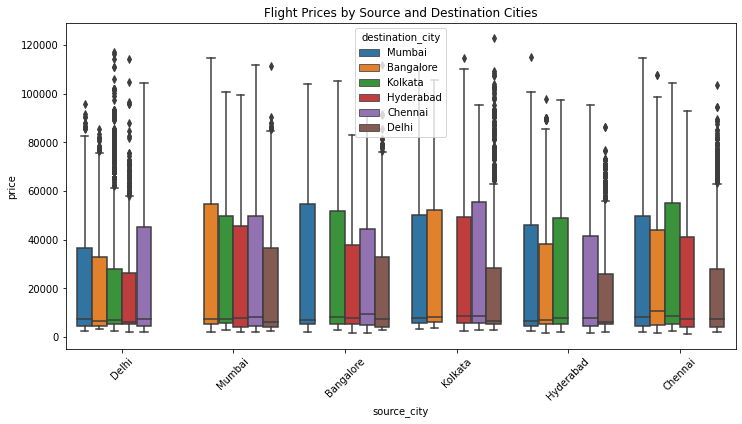

In [27]:
#To check how flight prices vary based on different source and destination city combinations:
plt.figure(figsize=(12,6))
sns.boxplot(x='source_city', y='price', hue='destination_city', data=flight)
plt.xticks(rotation=45)
plt.title('Flight Prices by Source and Destination Cities')
plt.show()

### Flight Prices by Class and Airline

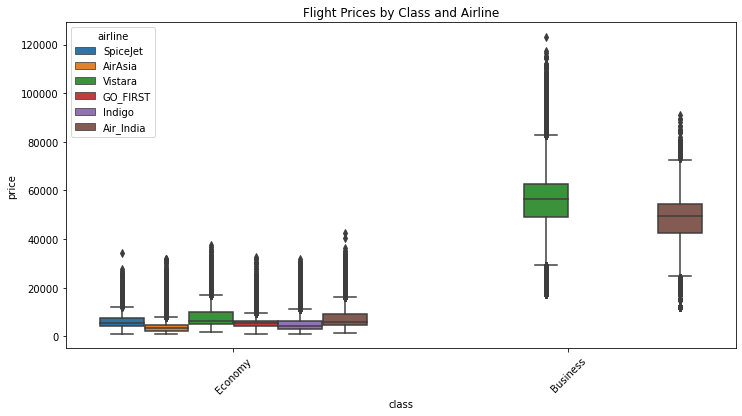

In [28]:
#To examine how different airlines price flights based on the class of travel:
plt.figure(figsize=(12,6))
sns.boxplot(x='class', y='price', hue='airline', data=flight)
plt.xticks(rotation=45)
plt.title('Flight Prices by Class and Airline')
plt.show()

### scatter plot

A scatter plot can be used to visualize relationships between two continuous variables. Here's how you can create scatter plots for different variable pairs in your flight dataset.

### Scatter Plot with Hue: Flight Price vs. Days Left by Class

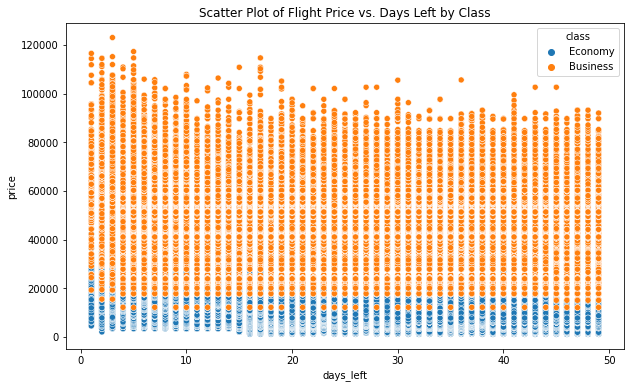

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='days_left', y='price', hue='class', data=flight)
plt.title('Scatter Plot of Flight Price vs. Days Left by Class')
plt.show()

### Scatter Plot: Flight Price vs. Duration by airline

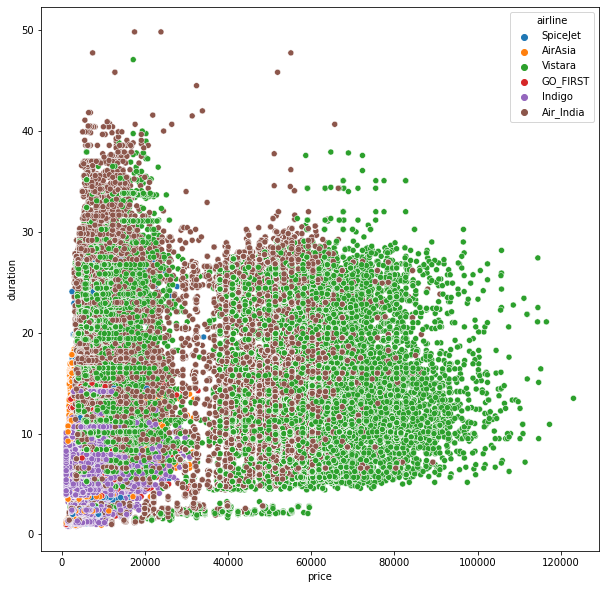

In [30]:
#To visualize how flight prices relate to the duration of the flights:
plt.figure(figsize=(10,10))
sns.scatterplot(x='price', y='duration', hue='airline',data=flight)
plt.show()

In [31]:
# Check unique values in the time columns
print(flight['departure_time'].unique())
print(flight['arrival_time'].unique())

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


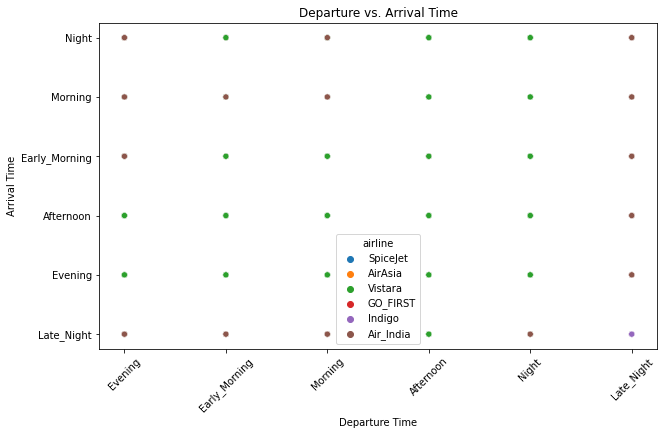

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='departure_time', y='arrival_time', hue='airline',data=flight)
plt.title('Departure vs. Arrival Time')
plt.xlabel('Departure Time')
plt.ylabel('Arrival Time')
plt.xticks(rotation=45)
plt.show()

### Line plot

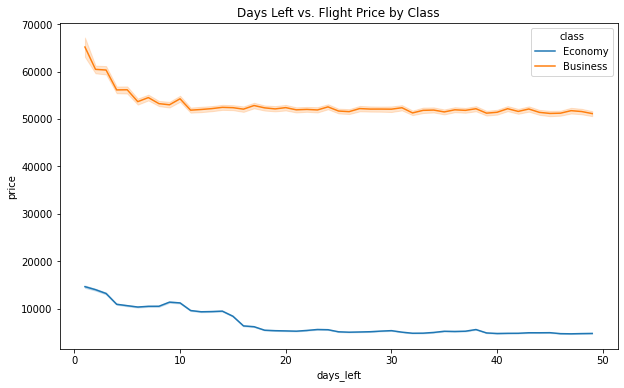

In [33]:
#To observe how the number of days left before departure affects prices in different travel classes:
plt.figure(figsize=(10,6))
sns.lineplot(x='days_left', y='price', hue='class', data=flight)
plt.title('Days Left vs. Flight Price by Class')
plt.show()

###  Pie Chart

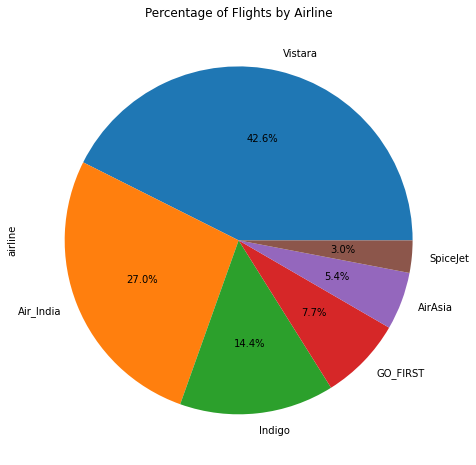

In [34]:
plt.figure(figsize=(8, 8))
flight['airline'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Flights by Airline')
plt.show()

### Pairplot

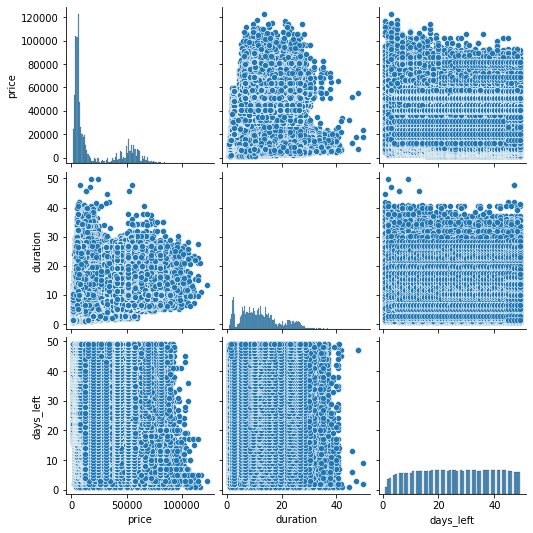

In [35]:
sns.pairplot(flight[['price', 'duration', 'days_left']])
plt.show()

### heatmap

In [36]:
# If there are more numerical features, calculate the correlation matrix
plt.figure(figsize=(8,6))
sns.set(font_scale=1.0)
sns.heatmap(flight[['duration','days_left','price']].corr(), annot=True,cmap='coolwarm')

<Axes: >